### Question 1: Identify the glass type (70)

Following is a data about the glass. Each observation represents one glass with its type and corresponding oxide content. There are 6 types of glass in the data.

In [12]:
import pandas as pd

glass = pd.read_csv('glass.csv')
glass.head()

,ID,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


1. Split the training and test data. Fit a decision tree and plot it. (10) 

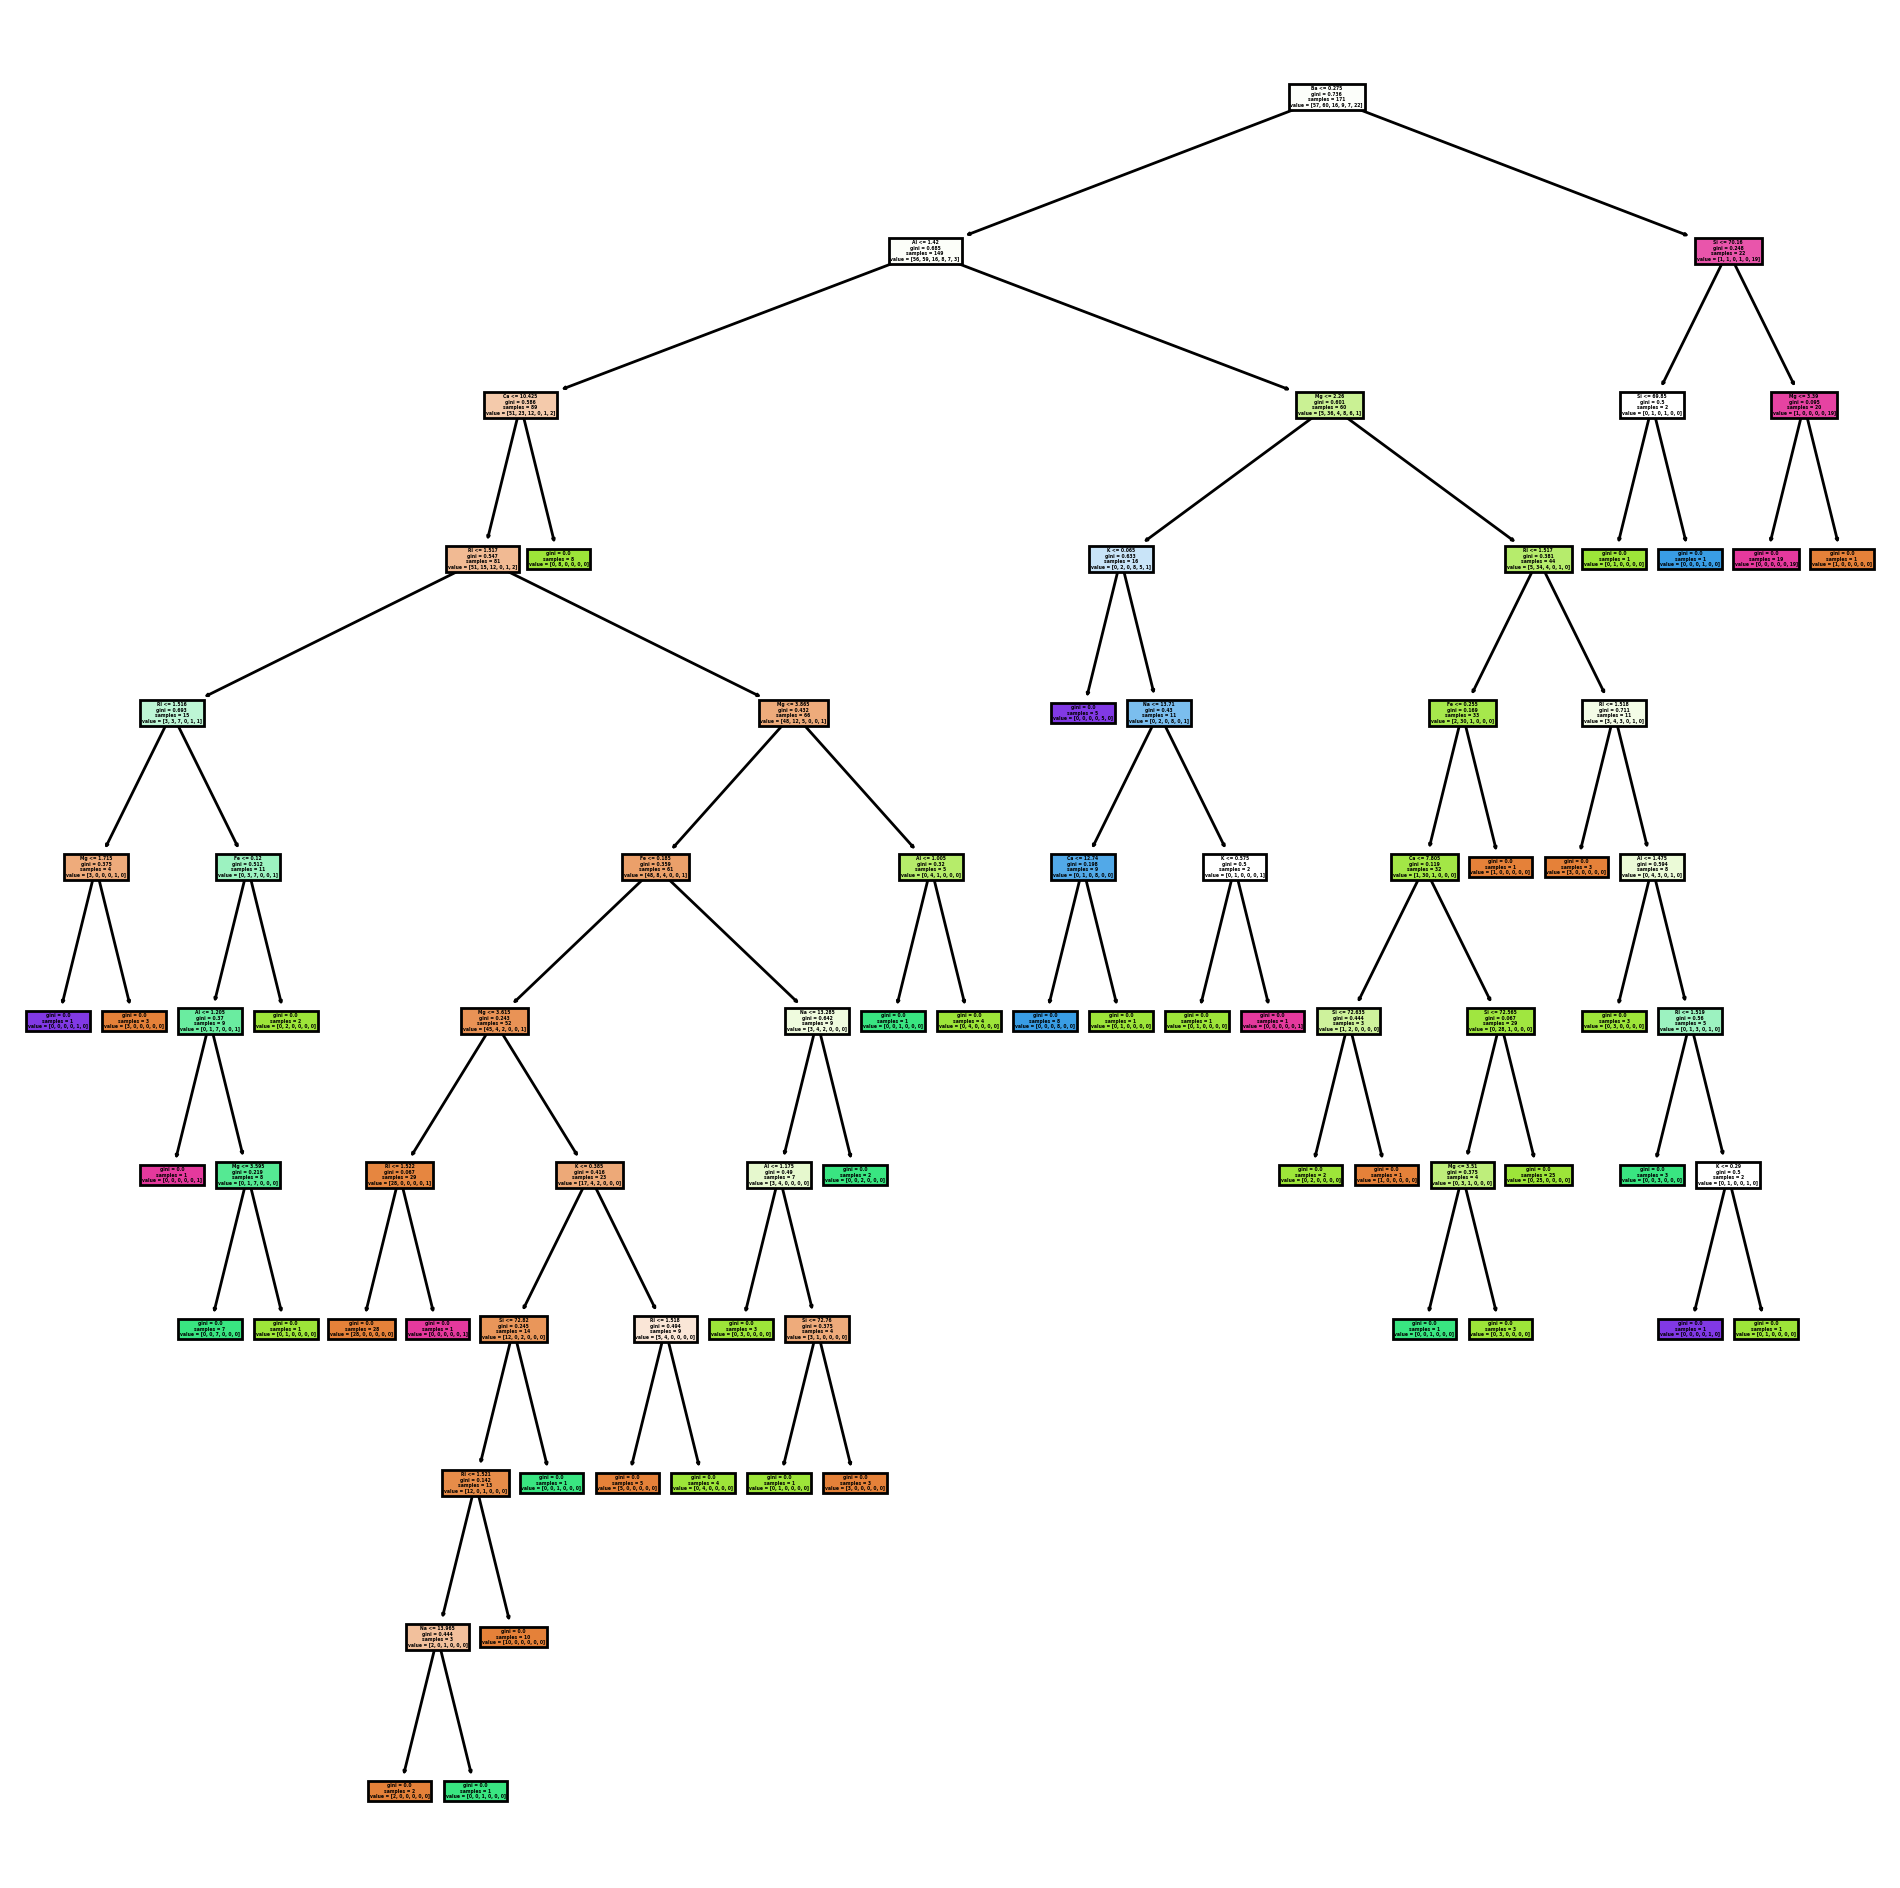

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = glass.iloc[:,1:10]
y = glass.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)
dt = DecisionTreeClassifier().fit(X_train, y_train)

plt.figure(figsize=(12,12), dpi=200)
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

In [11]:
dt_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)
print(accuracy)

0.6744186046511628


2. Pruning the tree with parameter ccp_alpha. Plot the best tree. Print the best parameter and accuracy. Note: remember to split the training data into training and validation. You can choose the alpha from 0.01 to 10, and ignore the warning message. (20)

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best accuracy:  0.627906976744186
Best parameter:  {'ccp_alpha': 0.01}


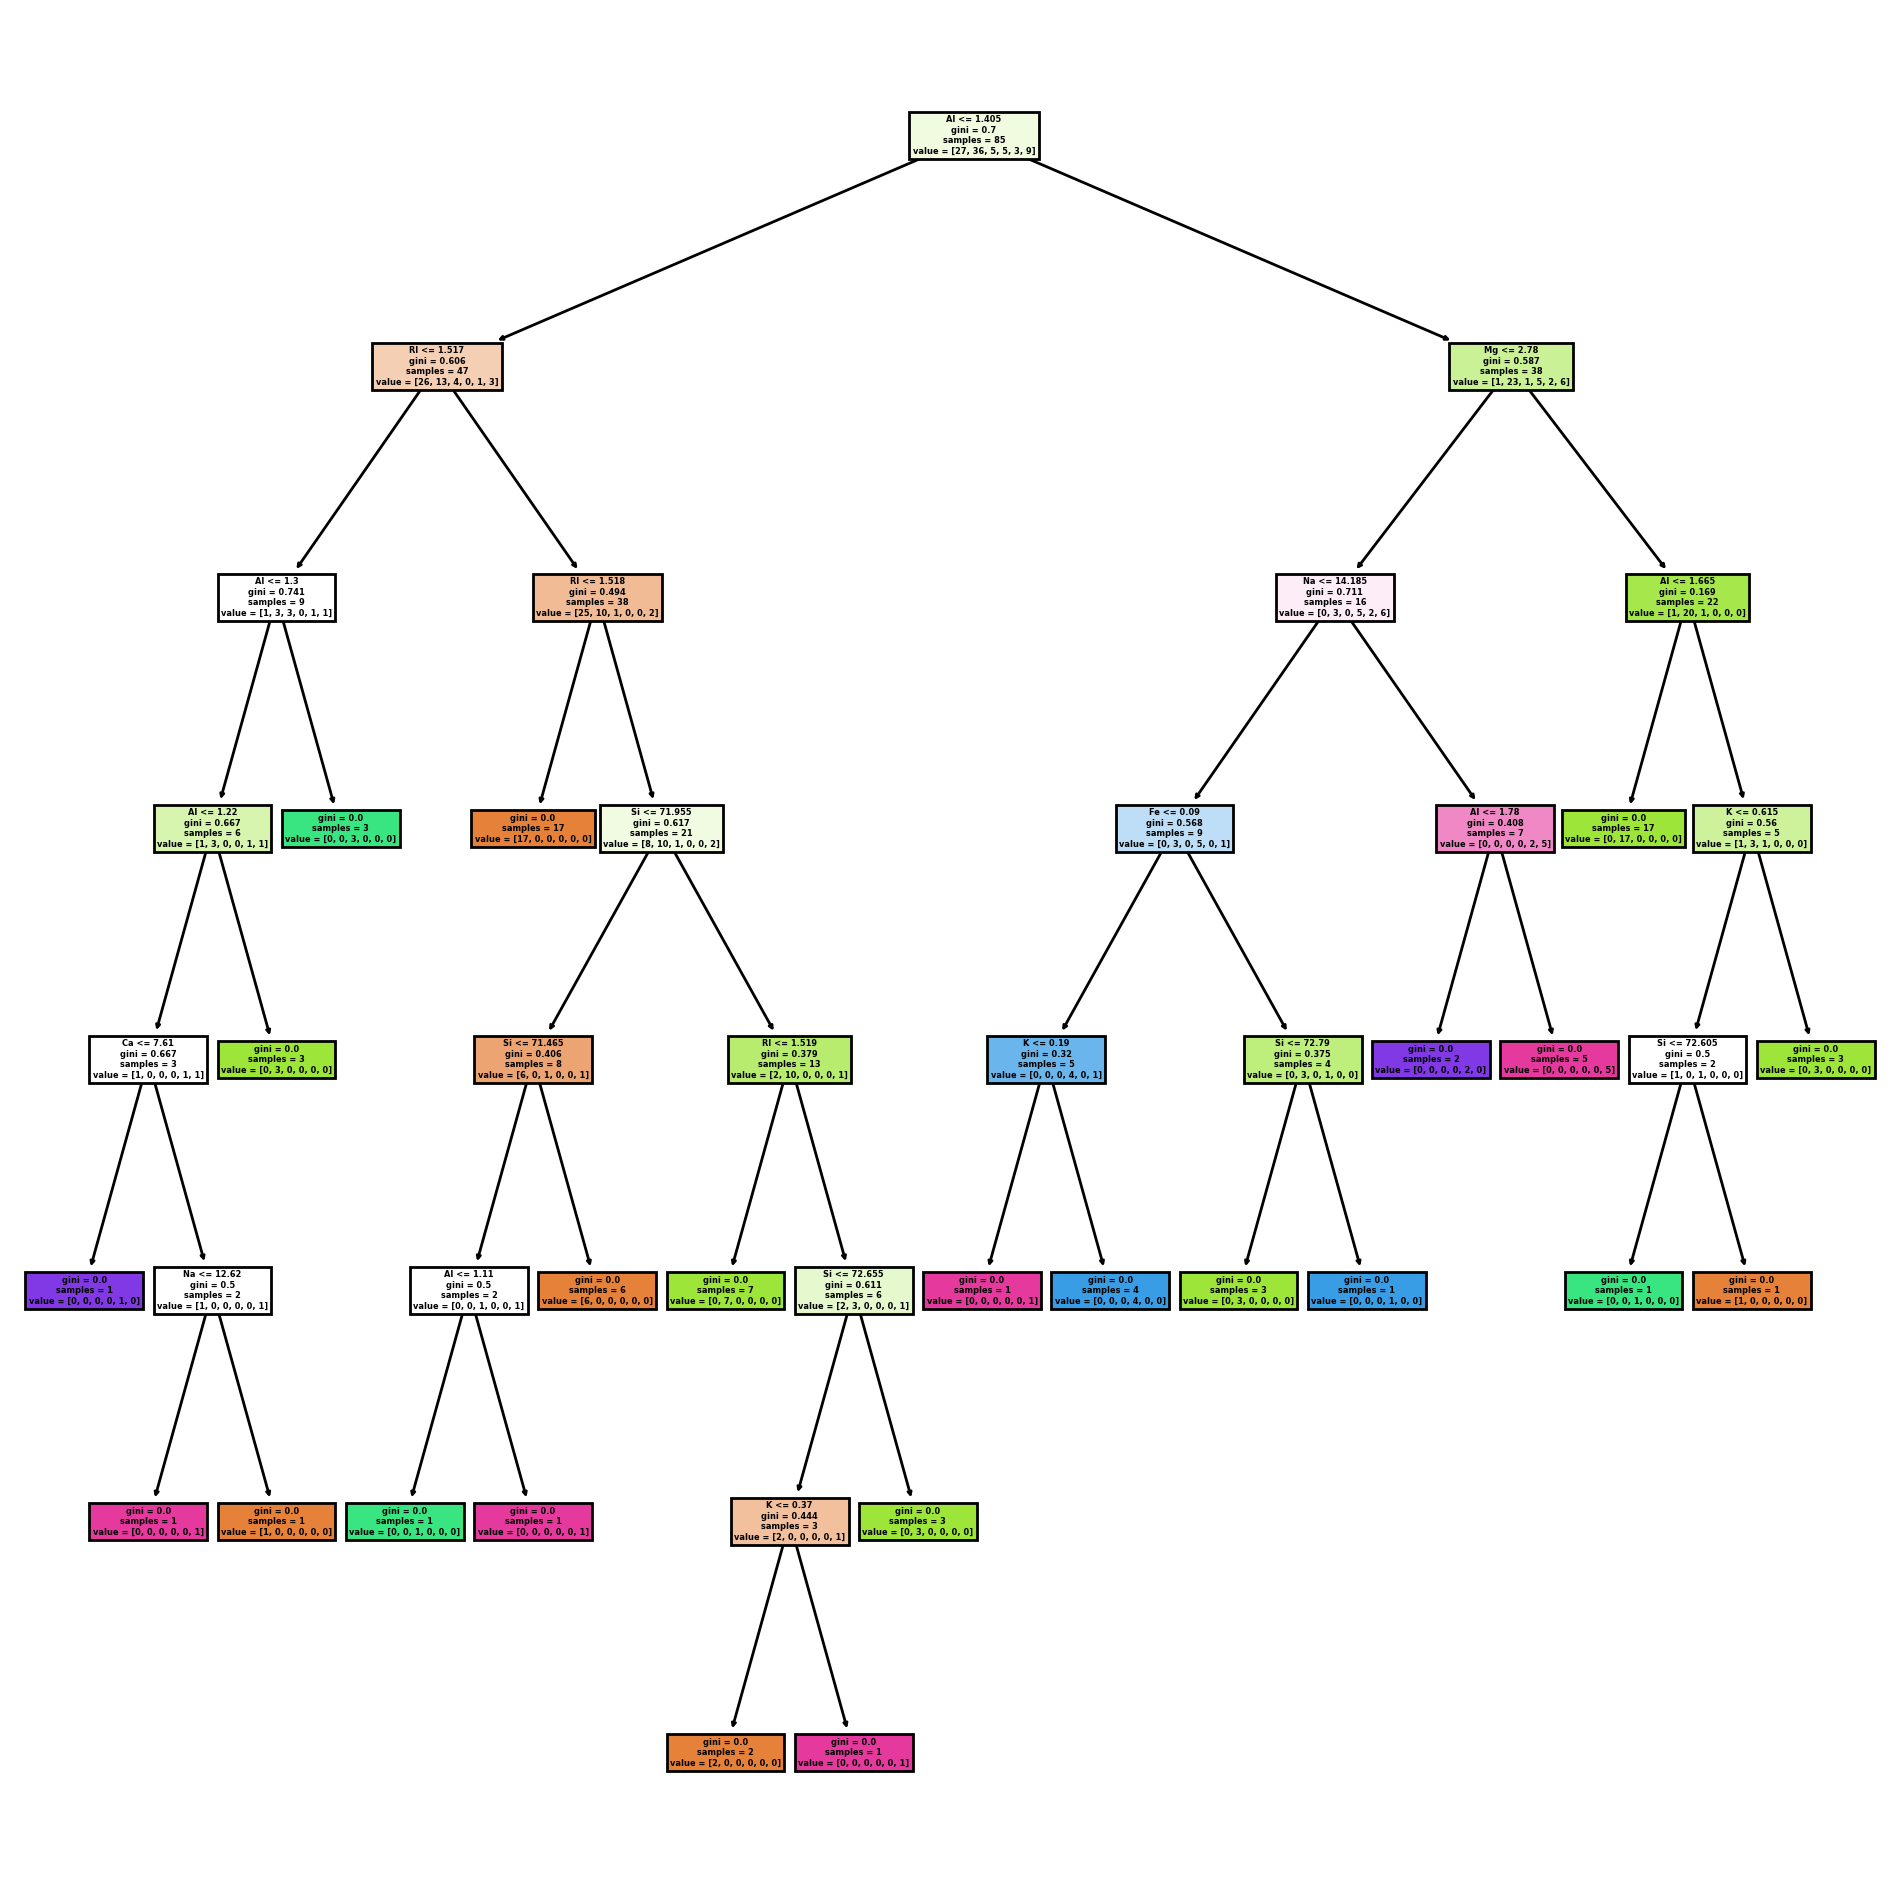

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size=0.5, random_state=4400)

dt = DecisionTreeClassifier()
param_grid = {'ccp_alpha': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_valid, y_valid)

# Get the best estimator and its parameters
best_params = grid_search.best_params_
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train1, y_train1)

# Make predictions using the best Random Forest classifier
y_pred = best_dt.predict(X_test)

# Calculate accuracy of the best Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Best accuracy: ", accuracy)
print("Best parameter: ", best_params)

plt.figure(figsize=(12,12), dpi=200)
plot_tree(best_dt, filled=True, feature_names=X.columns)
plt.show()

3. Fit an Adaboost model. Set the n_estimator equal to 100. Print the accuracy. (10) 

In [4]:
from sklearn.ensemble import AdaBoostClassifier

# Create and fit an AdaBoost classifier with decision tree as the base estimator
adaboost = AdaBoostClassifier(n_estimators=100, random_state=4400)
adaboost.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
adaboost_pred = adaboost.predict(X_test)

# Calculate accuracy of the AdaBoost classifier
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
print(adaboost_accuracy)

0.46511627906976744


4. Fit a random forest model. Tune the parameters 'n_estimators', 'max_depth', 'min_samples_leaf' and 'max_features', Print the accuracy and show the variable important plot. (20)

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=4400)

# Define the parameter grid for grid search
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 3, 5], 'min_samples_leaf': [1, 3, 5],
              'max_features': ['sqrt', 'log2']}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_valid, y_valid)

# Get the best estimator and its parameters
best_params = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train1, y_train1)

# Make predictions using the best Random Forest classifier
y_pred = best_rf.predict(X_test)

# Calculate accuracy of the best Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(best_params)

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.7906976744186046
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}


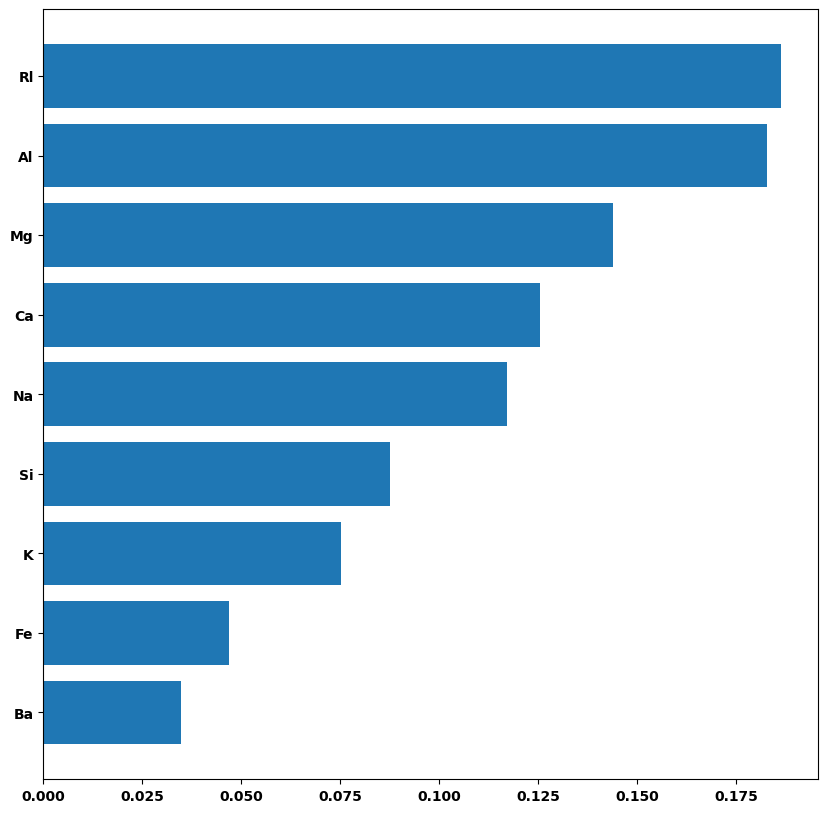

In [6]:
import numpy as np

# Plot the variable importance for Random Forest
importances =best_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.show()

5. Fit another decision tree with the most three important features. Plot the decision tree and print the accuracy. (10)

Accuracy:  0.6744186046511628


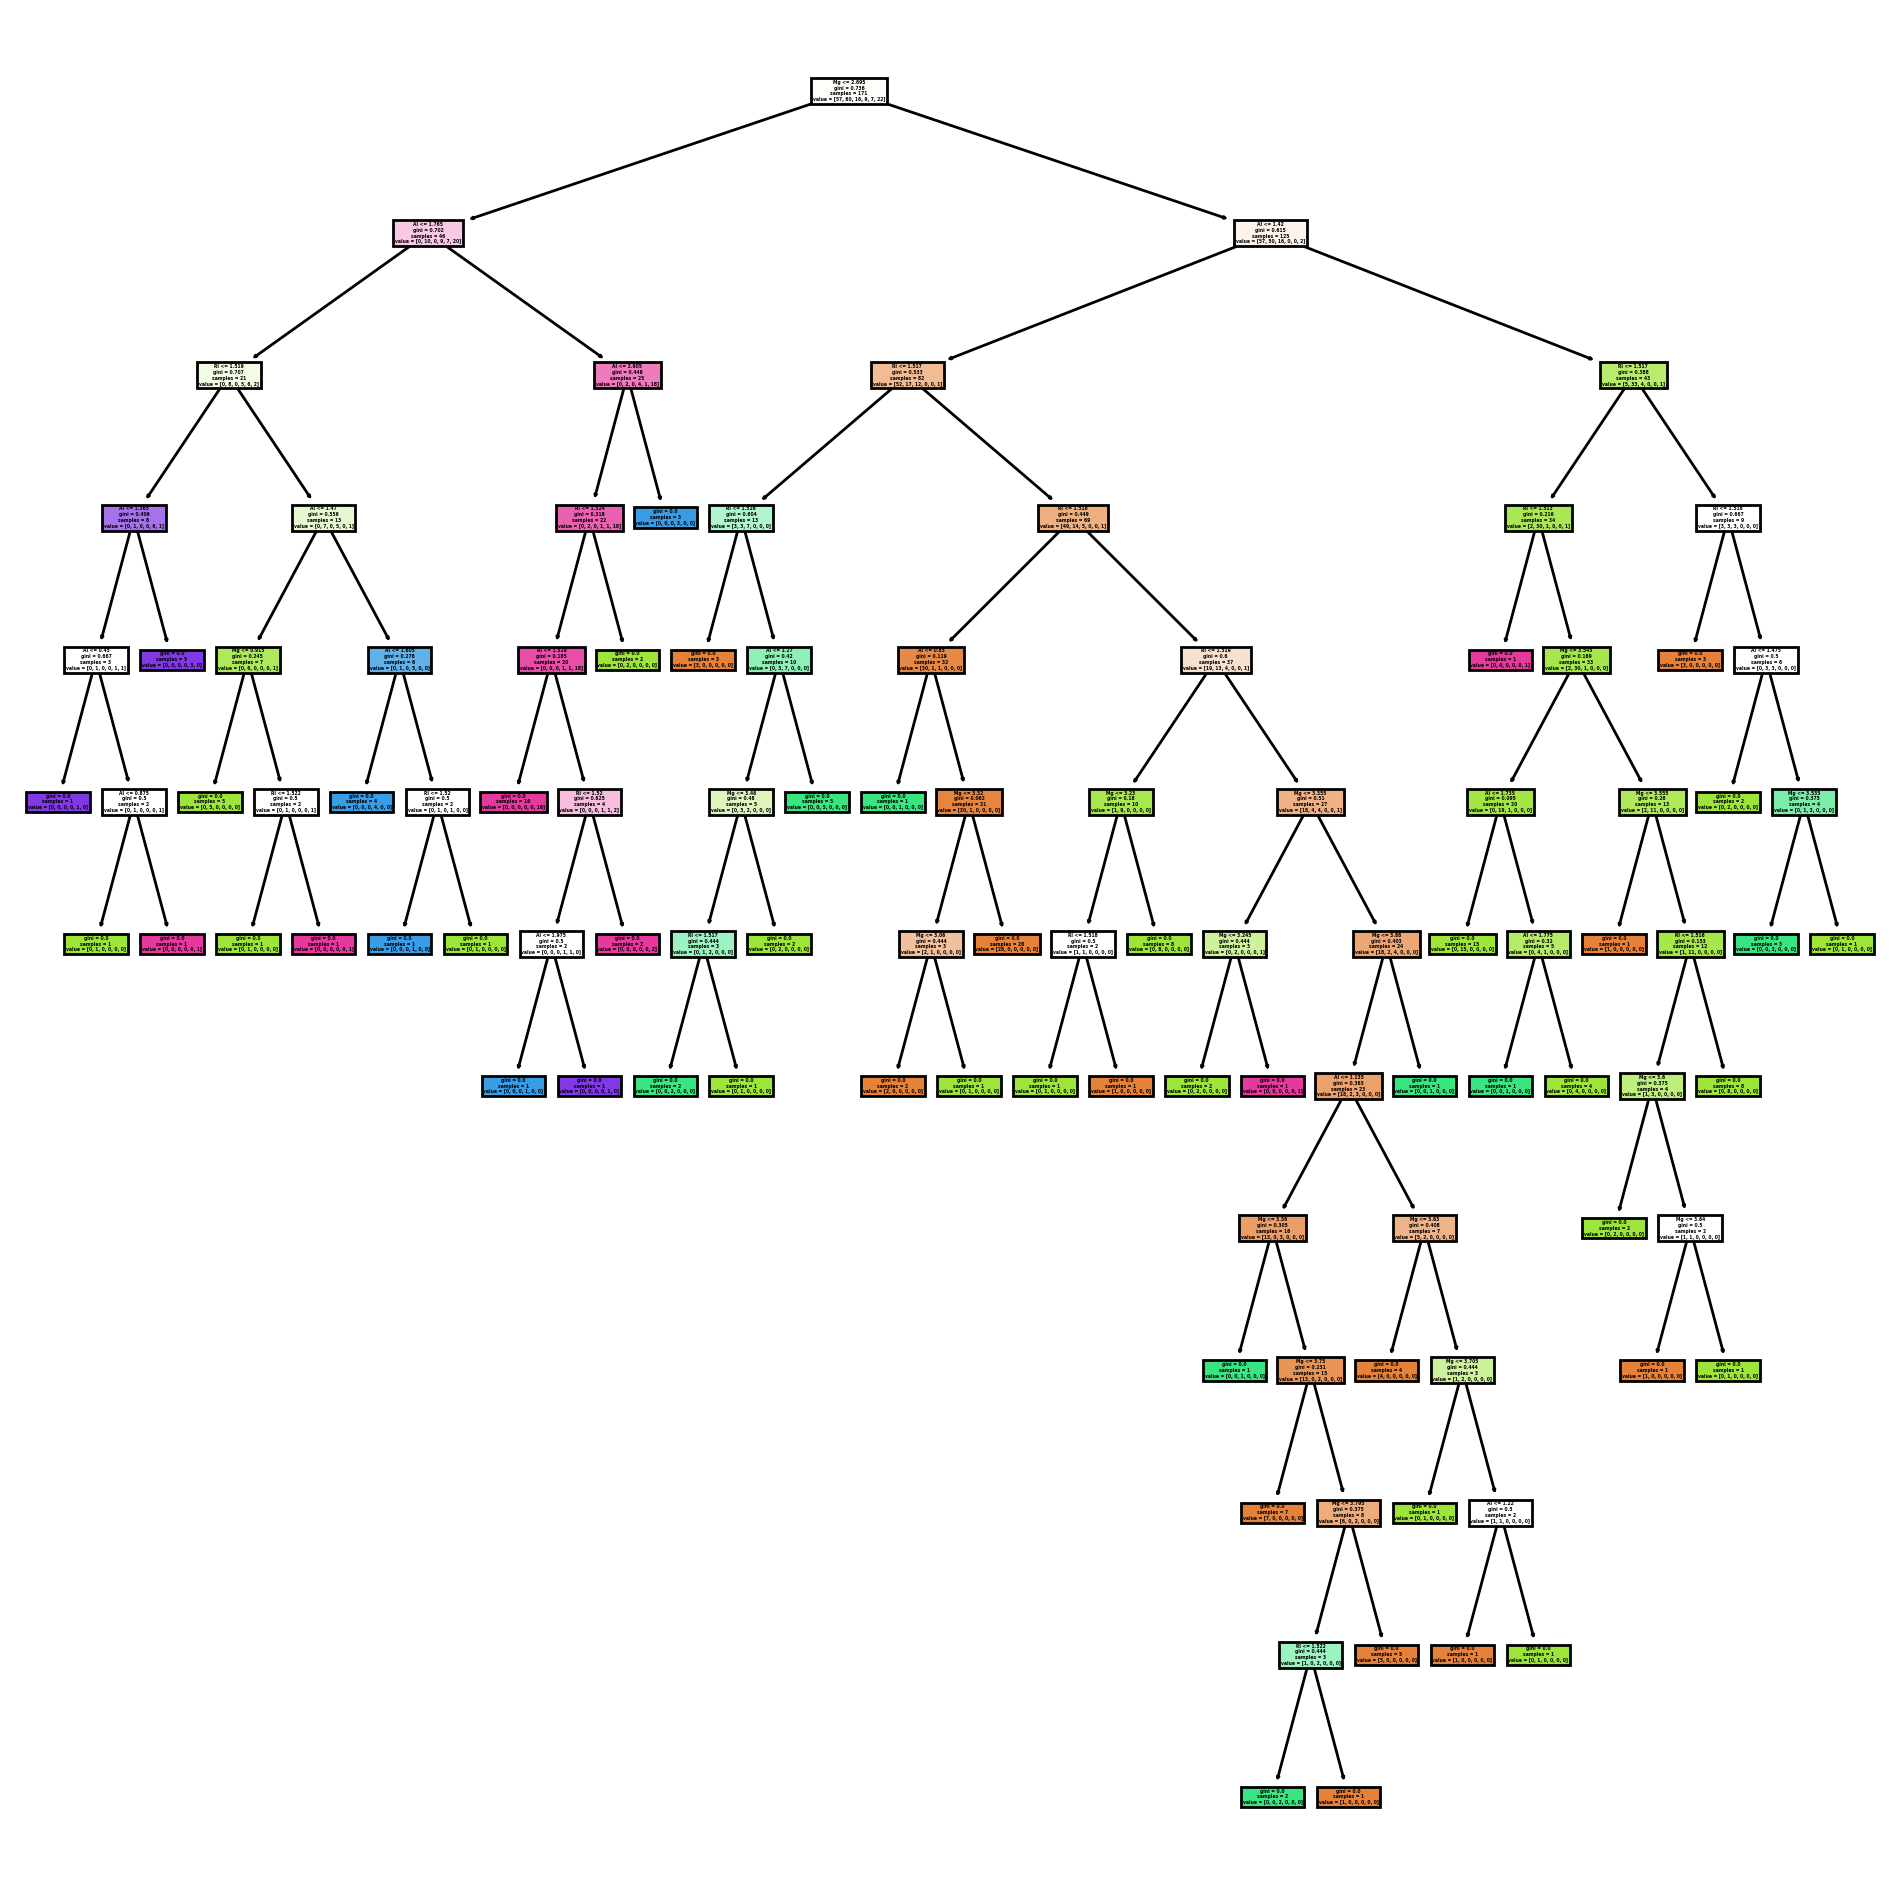

In [7]:
X = glass.iloc[:,1:5].drop(columns=['Na'])
y = glass.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy: ", dt_accuracy)

plt.figure(figsize=(12,12), dpi=200)
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

### Question 2: Models comparison (30)

1. List a couple of characteristics that may lead you to consider using random forest. (Data size, features, etc. )

I would consider using a random forest model if I know that I have a lot of features since this model is robust to the curse of dimensionality. This is because each tree uses a subset of the features instead of using all of them like in a decision tree. This makes random forests more robust to overfitting, especially when compared to single decision trees. Moreover, with a random forest we can extract the most importance features since each tree in the ensemble keeps track of the variable importance metric per feature. Hence, we can effectively perform feature selection using random forests. Other reasons that may lead me to a random forest are:
- They can capture nonlinear relationships;
- They handle missing values in datasets without the need of imputing

2. Compare the differences between Logistics regression and Random forest. 

The logistic regression model assumes a linear relationship between the features and the log-odds of the response variable, while random forests can capture complex non-linear relationships in the data. Moreover, the logistic regression model is generally more interpretable, as the coefficients of the features can be directly interpreted in terms of their impact on the log-odds of the response variable. On the other hand, it can be difficult to interpret the individual decision trees that make a random forest, and instead you have to rely on the feature importance scores. 

3. Explain why Random Forest is called "random forest"?

Random forest derives its name from two key randomization strategies employed during training. Firstly, each tree is trained on a random subset (bootstrap sample) of the training data, promoting diversity. Secondly, at each split in a tree, only a random subset of features is considered. These random elements prevent overfitting, enhancing the model's robustness and predictive accuracy.